<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Is-Educational-Attainment-Still-a-Predictor-for-Higher-Income?" data-toc-modified-id="Is-Educational-Attainment-Still-a-Predictor-for-Higher-Income?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Is Educational Attainment Still a Predictor for Higher Income?</a></span><ul class="toc-item"><li><span><a href="#Determining-the-features" data-toc-modified-id="Determining-the-features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Determining the features</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Encoding</a></span></li></ul></li><li><span><a href="#With-One-Hot-Encoding" data-toc-modified-id="With-One-Hot-Encoding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>With One Hot Encoding</a></span><ul class="toc-item"><li><span><a href="#Checking-the-model" data-toc-modified-id="Checking-the-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Checking the model</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#ROC-curve" data-toc-modified-id="ROC-curve-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>ROC curve</a></span></li><li><span><a href="#AUC-Score" data-toc-modified-id="AUC-Score-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>AUC Score</a></span></li></ul></li></ul></li><li><span><a href="#No-hot-encoding" data-toc-modified-id="No-hot-encoding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>No hot encoding</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#AUC-Score" data-toc-modified-id="AUC-Score-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>AUC Score</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Cross Validation</a></span></li></ul></li></ul></li><li><span><a href="#Lets-try-a-grid-search!" data-toc-modified-id="Lets-try-a-grid-search!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lets try a grid search!</a></span></li><li><span><a href="#What-about-a-Tree?" data-toc-modified-id="What-about-a-Tree?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What about a Tree?</a></span></li></ul></div>

# Is Educational Attainment Still a Predictor for Higher Income?

## Determining the features

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import plotly
sns.set()

1. The labels
   1| 0-49999 low income holders
   2| 50000 - 150000 high income holders
2. Features
   1. Educational Attainment - 1| No College 2| Bachelor's & Associates 3| High Degree Holders
   2. Ethnicity - 1| Hispanic 2|White 3|

In [3]:
data = pd.read_csv('combined_edu_income.csv')

In [5]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'case_id', 'education',
       'age', 'employed', 'gender', 'spouse_empl', 'num_child',
       'full_part_wrk', 'weekly_earn', 'weights', 'year', 'income', 'all_eth',
       'educaton_text', 'income_text', 'gender_text', 'ethnicity_text',
       'spouse_text', 'full_part_text', 'educ_comb', 'inc_comb'],
      dtype='object')

In [20]:
data2 = data[['age','gender', 'num_child', 'income','all_eth','education']]


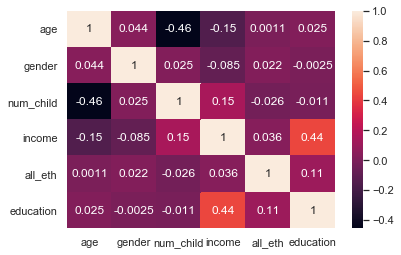

In [21]:
corrmatrix = data2.corr()
sns.heatmap(corrmatrix, annot=True)

## Encoding

# With One Hot Encoding

In [114]:
features = data[['age','gender','num_child','ethnicity_text','education']]

In [135]:
labels_1 = data['inc_comb']

In [137]:
labels_1.value_counts()

2    61228
1    60117
Name: inc_comb, dtype: int64

In [227]:
y = data['inc_comb'].apply(lambda x: 0 if x == 1 else 1)

In [139]:
y.value_counts()

1    61228
0    60117
Name: inc_comb, dtype: int64

In [226]:
X = pd.get_dummies(features, drop_first=True)

In [141]:
X.columns

Index(['age', 'gender', 'num_child', 'education', 'ethnicity_text_Black',
       'ethnicity_text_Hispanic', 'ethnicity_text_Native American',
       'ethnicity_text_Other', 'ethnicity_text_White'],
      dtype='object')

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [145]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [146]:
log_mod = LogisticRegression()
log_mod.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
log_mod.score(X_train_std, y_train)

0.6871111294243686

In [148]:
log_mod.score(X_test_std, y_test)

0.6902220940294203

In [149]:
print(list(zip(['age', 'gender', 'num_child', 'education', 'ethnicity_text_Black',
       'ethnicity_text_Hispanic', 'ethnicity_text_Native American',
       'ethnicity_text_Other', 'ethnicity_text_White'],log_mod.coef_[0])))

[('age', -0.28850362180355904), ('gender', -0.16164648966014825), ('num_child', 0.20493701155441843), ('education', 0.827009051324948), ('ethnicity_text_Black', -0.06516333484210092), ('ethnicity_text_Hispanic', -0.2873469944022101), ('ethnicity_text_Native American', -0.33571728906700343), ('ethnicity_text_Other', -0.04797477718604002), ('ethnicity_text_White', -0.021003187520685255)]


## Checking the model

In [150]:
from sklearn.metrics import confusion_matrix, classification_report


In [151]:
y_pred = log_mod.predict(X_test_std)

### Confusion Matrix

In [152]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8556 3489]
 [4029 8195]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69     12045
           1       0.70      0.67      0.69     12224

    accuracy                           0.69     24269
   macro avg       0.69      0.69      0.69     24269
weighted avg       0.69      0.69      0.69     24269



In [153]:
from sklearn.metrics import roc_curve

In [154]:
y_pred_porb = log_mod.predict_proba(X_test_std)[:,1]

In [155]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_porb)

### ROC curve

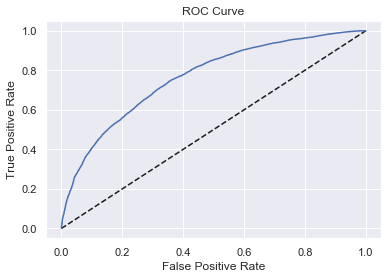

In [156]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [157]:
from sklearn.metrics import roc_auc_score

### AUC Score

In [159]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_porb)))

AUC: 0.764455516534853


In [160]:
from sklearn.model_selection import cross_val_score

In [162]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [164]:
cv_auc = cross_val_score(log_mod, X_std, y, cv = 5, scoring='roc_auc')

In [165]:
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.76661209 0.75850337 0.75971002 0.75702539 0.76104283]


# No hot encoding

In [192]:
X_2 = data[['age','gender','num_child','all_eth','education']]

In [193]:
y_2 = data['inc_comb'].apply(lambda x: 0 if x == 1 else 1)

In [194]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2)

In [195]:
scaler = StandardScaler()
X_train_std_2 = scaler.fit_transform(X_train_2)
X_test_std_2 = scaler.transform(X_test_2)

In [196]:
log_mod = LogisticRegression()
log_mod.fit(X_train_std_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
log_mod.score(X_train_std_2, y_train_2)

0.673822572005439

In [198]:
print(list(zip(['age','gender','num_child','all_eth','edu_comb'],log_mod.coef_[0])))

[('age', -0.2608479438314101), ('gender', -0.16948745816856828), ('num_child', 0.21660383262093885), ('all_eth', -0.0046840961746876224), ('edu_comb', 0.8912008776414874)]


In [199]:
from sklearn.metrics import roc_curve

In [200]:
y_pred_prob_2 = log_mod.predict_proba(X_test_std_2)[:,1]

In [201]:
fpr,tpr,thresholds = roc_curve(y_test_2,y_pred_prob_2)

### ROC Curve

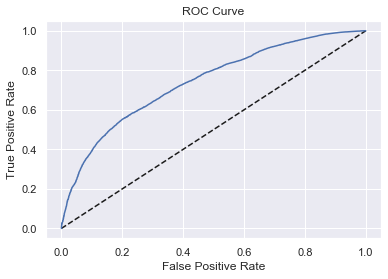

In [202]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [203]:
from sklearn.metrics import roc_auc_score

### AUC Score

In [204]:
print("AUC: {}".format(roc_auc_score(y_test_2, y_pred_prob_2)))

AUC: 0.7407363501702044


In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
scaler = StandardScaler()
X_std_2 = scaler.fit_transform(X_2)

### Cross Validation

In [207]:
cv_auc = cross_val_score(log_mod, X_std_2, y_2, cv = 5, scoring='roc_auc')

In [208]:
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.74479459 0.73892182 0.74249186 0.73911632 0.74734634]


# Lets try a grid search!

In [210]:
from sklearn.model_selection import GridSearchCV

In [234]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = np.logspace(-5, 8, 15)
param_grid = dict(penalty=penalty, solver=solver, C=C)


In [235]:
log_grid = LogisticRegression()
grid = GridSearchCV(estimator=log_grid, param_grid=param_grid, n_jobs=-1)

In [236]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [237]:
grid_result = grid.fit(X_std, y)

In [238]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.689670 using {'C': 8.483428982440725e-05, 'penalty': 'l2', 'solver': 'sag'}
